In [1]:
import numpy as np
import scipy as sp
import sklearn
import pydotplus

import mglearn

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sn
sn.set_context("poster")
sn.set(rc={'figure.figsize': (20, 12.)})
sn.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set = mglearn.datasets.load_citibike()

In [9]:
data_set.head(n=10)

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
2015-08-01 15:00:00    27
2015-08-01 18:00:00    12
2015-08-01 21:00:00     4
2015-08-02 00:00:00     3
2015-08-02 03:00:00     4
Freq: 3H, Name: one, dtype: int64

Text(0, 0.5, 'Rentals')

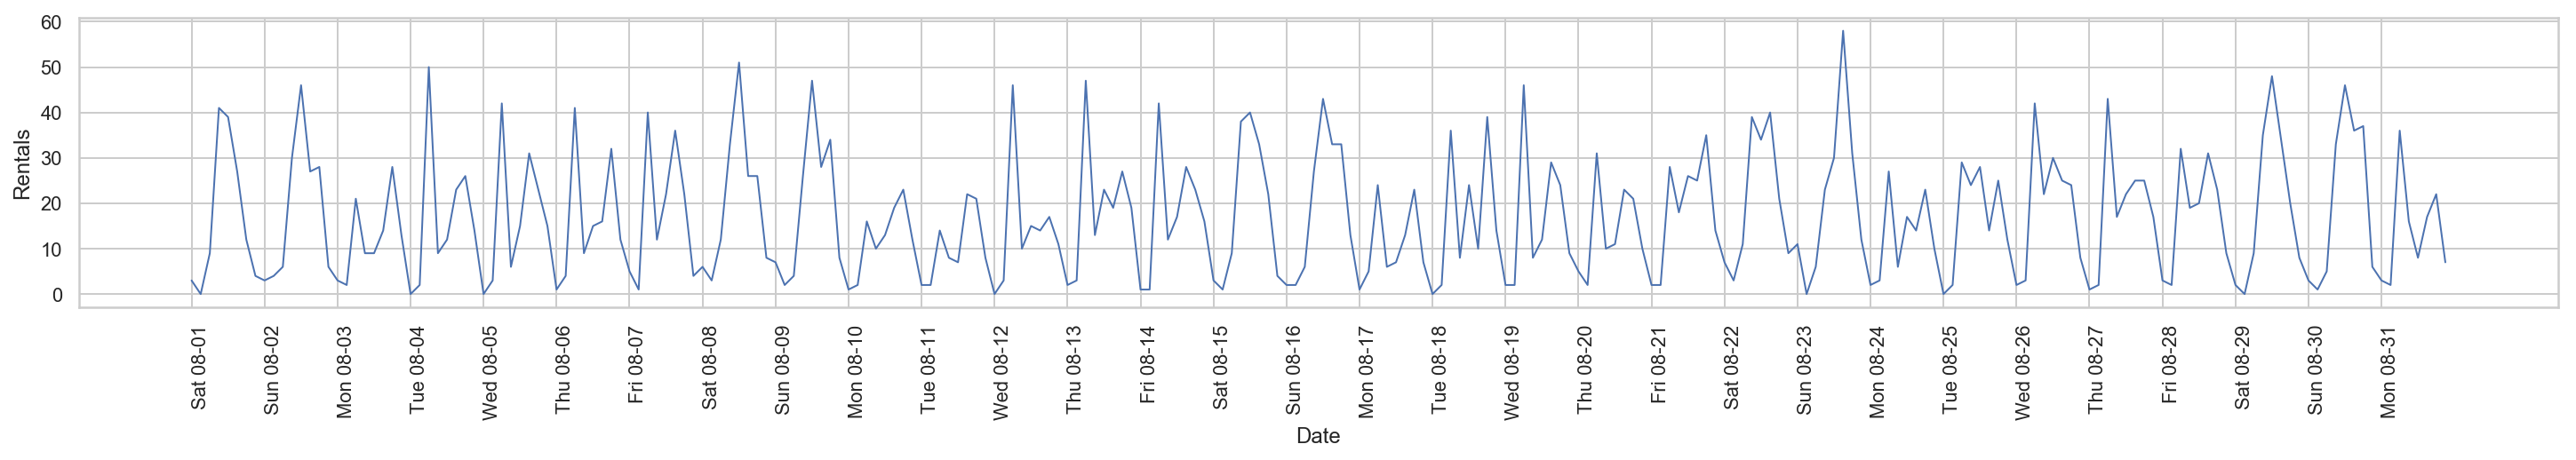

In [8]:
plt.figure(figsize=(25,3))
xticks = pd.date_range(start=data_set.index.min(), end=data_set.index.max(),freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(data_set, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [19]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

In [17]:
y = data_set.values
X_hour = data_set.index.hour.values.reshape(-1,1)

Test-set R^2: 0.60


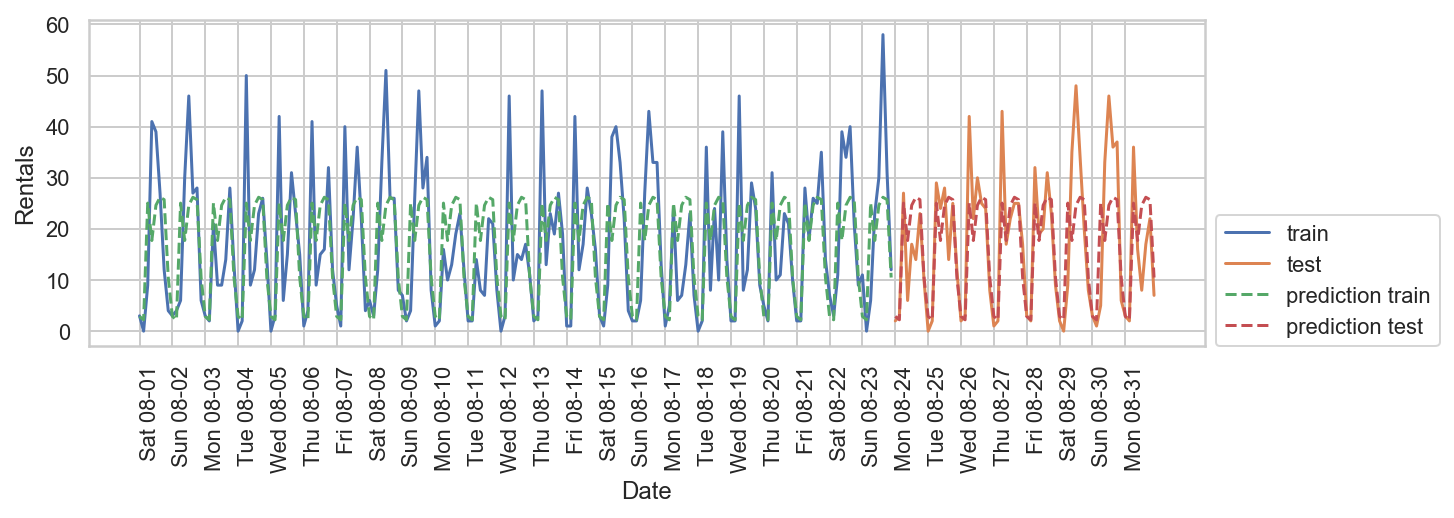

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


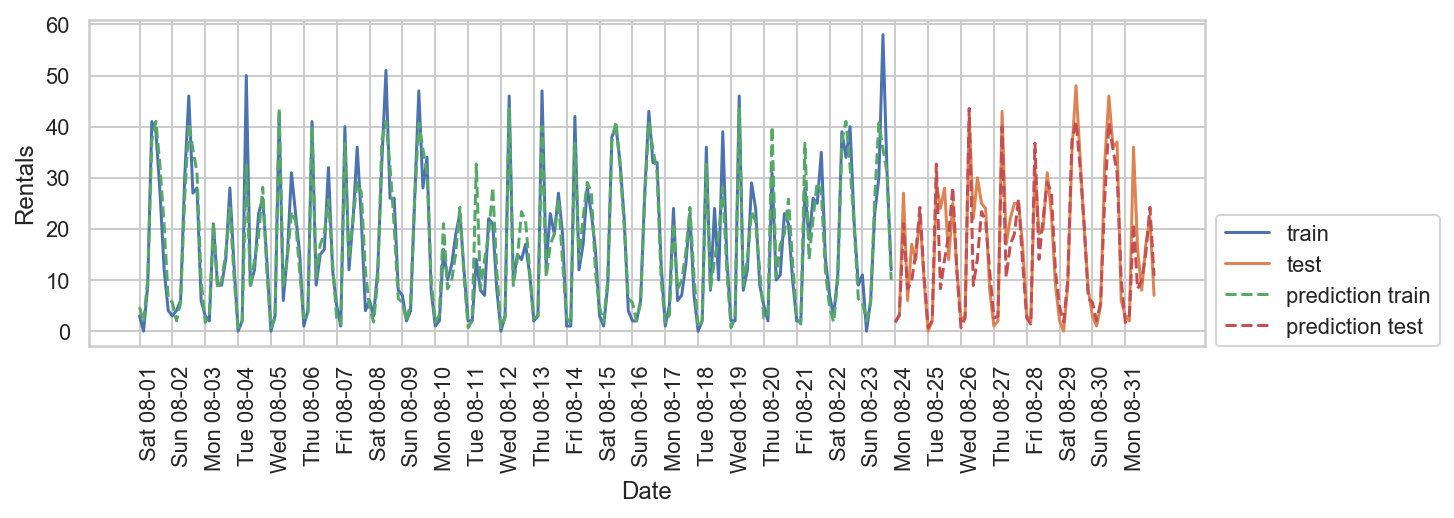

In [22]:
X_hour_week = np.hstack([data_set.index.dayofweek.values.reshape(-1,1), data_set.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


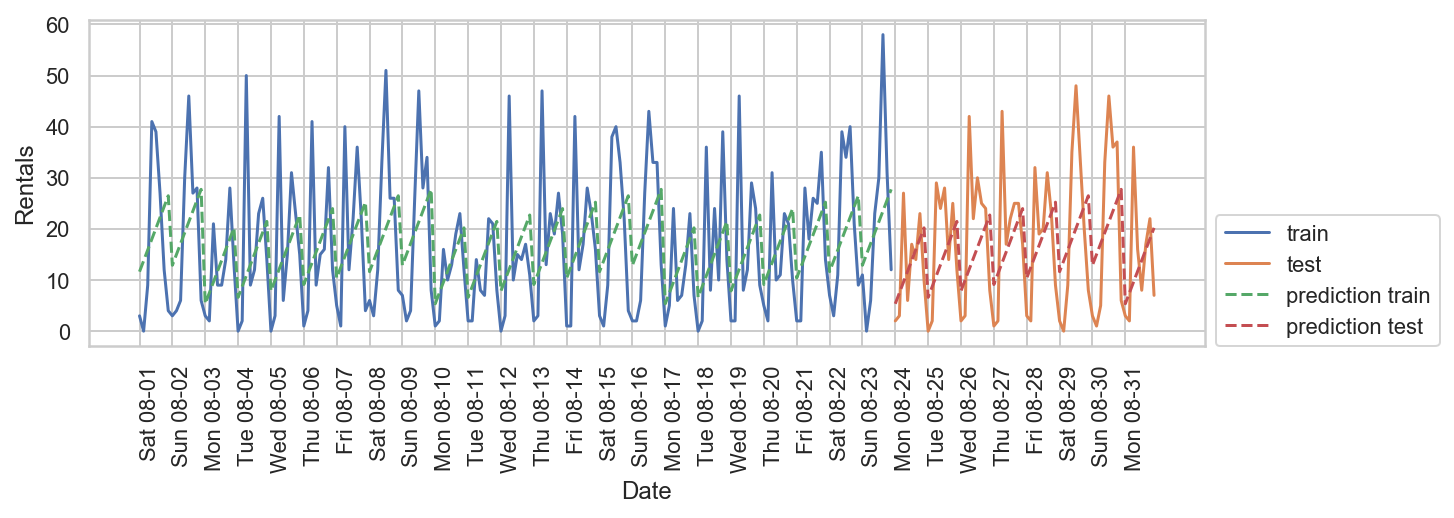

In [23]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
enc = OneHotEncoder()

In [29]:
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

In [30]:
X_hour_week_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

Test-set R^2: 0.61


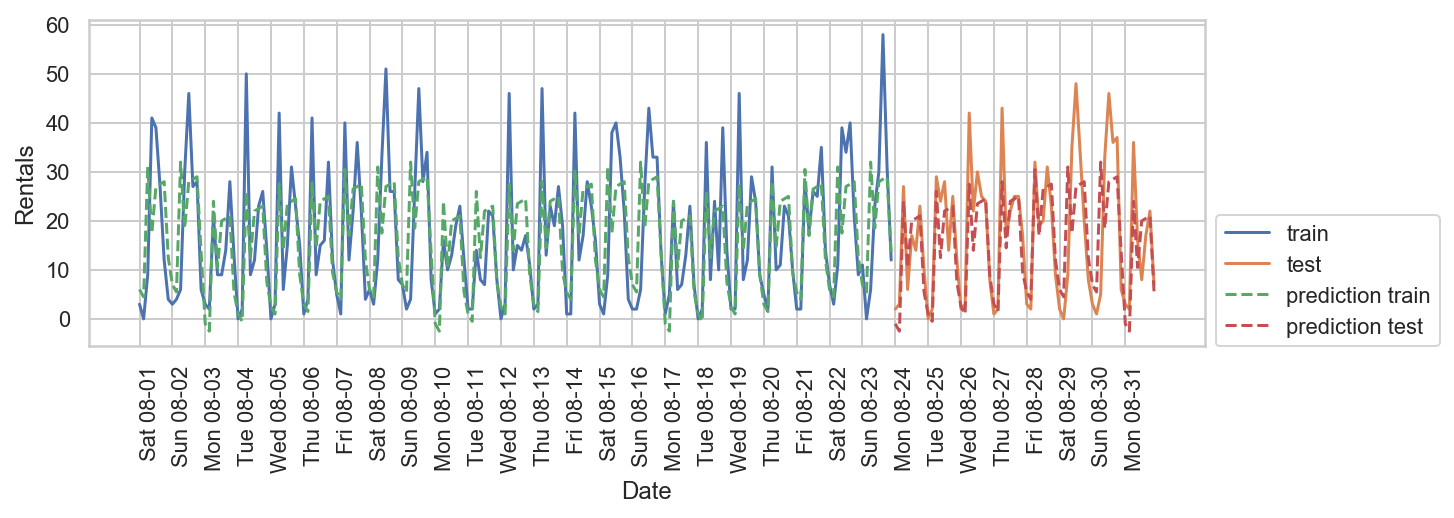

In [31]:
eval_on_features(X_hour_week_onehot, y, LinearRegression())

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [36]:
poly.fit(X_hour_week_onehot)
X_hour_week_onehot_poly = poly.transform(X_hour_week_onehot)

Test-set R^2: 0.72


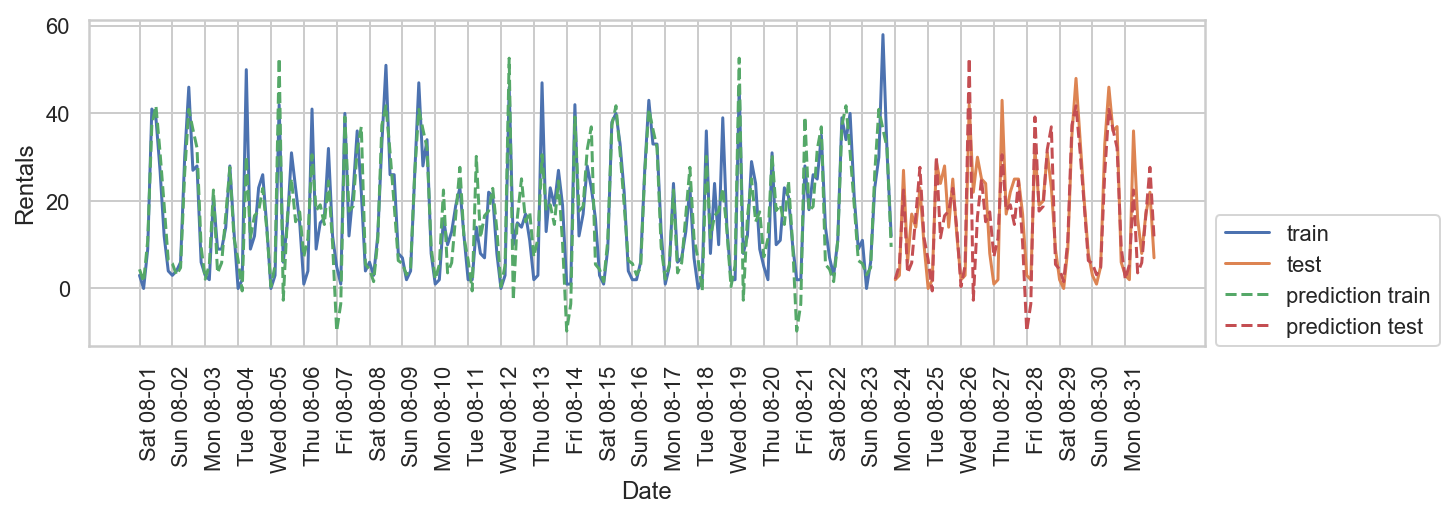

In [37]:
eval_on_features(X_hour_week_onehot_poly, y, LinearRegression())